In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.special import logit, expit

### Predict whether customers based on their age will buy boat insurance

In [2]:
age_lt40 = np.random.randint(18, 40, 50)
age_gt40 = np.random.randint(40, 80, 50)

In [3]:
age = np.hstack((age_lt40, age_gt40))

In [4]:
insurance_lt40 = [0 for i in range(50)]
insurance_gt40 = [1 for i in range(50)]

In [5]:
insurance = np.hstack((insurance_lt40, insurance_gt40))

In [6]:
df = pd.DataFrame({"age": age, "insurance": insurance})

In [7]:
df.head(5)

,age,insurance
0,26,0
1,36,0
2,31,0
3,39,0
4,27,0


In [8]:
slope, intercept, rval, pval, std_err = stats.linregress(df.age, df.insurance)
slope, intercept

(0.024269400814657918, -0.5341191687125739)

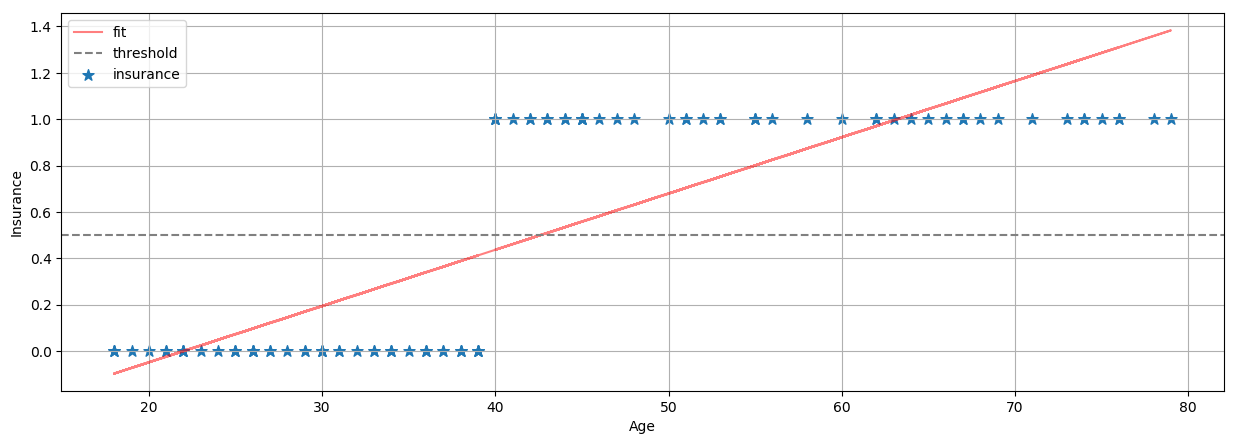

In [9]:
plt.figure(figsize=(15,5), dpi=100)
plt.scatter(df.age, df.insurance, marker="*", label="insurance", s=70)
plt.plot(df.age, intercept + slope * df.age, color="r", label="fit", alpha=0.5)
plt.axhline(0.5, linestyle="--", color="gray", label="threshold")
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.legend()
plt.grid()
plt.show()

#### The above plot shows that linear regression is not be a good fit. 
#### Let's try Logisitic regression.

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(df.age, df.insurance, random_state=0)

In [11]:
X_train = pd.DataFrame(X_train)
Y_train = pd.DataFrame(Y_train)
X_test = pd.DataFrame(X_test)
Y_test = pd.DataFrame(Y_test)

In [12]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)

/Users/Dominance/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/Dominance/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [14]:
y_pred = lr.predict(X_test)

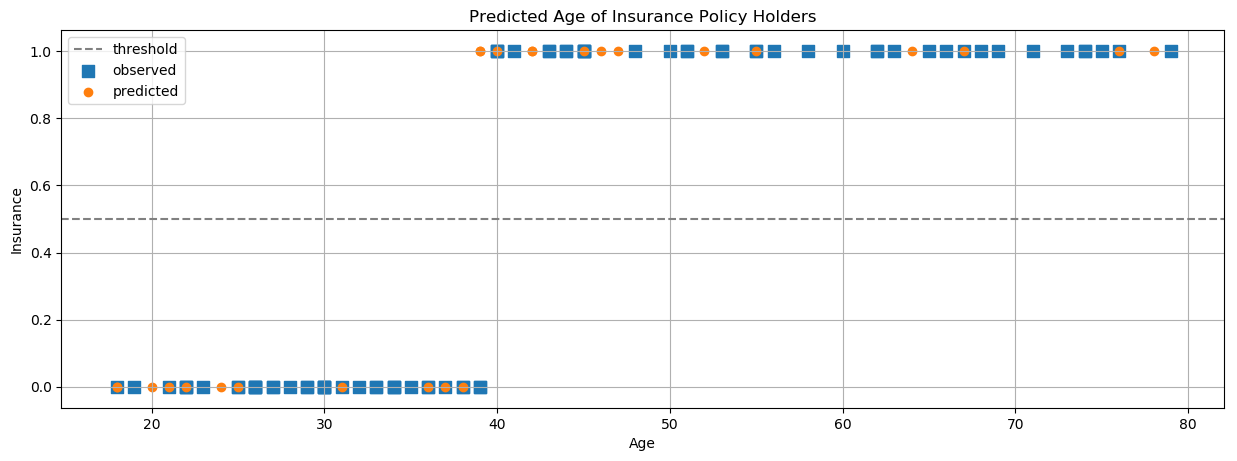

In [44]:
plt.figure(figsize=(15,5), dpi=100)
plt.scatter(X_train, Y_train, marker="s", label="observed", s=70)
plt.scatter(X_test, y_pred, label="predicted")
plt.axhline(0.5, linestyle="--", color="gray", label="threshold")
plt.xlabel("Age")
plt.ylabel("Insurance")
plt.legend()
plt.title("Predicted Age of Insurance Policy Holders")
plt.grid()
plt.show()

#### Train data accuracy

In [16]:
lr.score(X_train, Y_train)

0.9733333333333334

#### Test data accuracy

In [17]:
lr.score(X_test, Y_test)

0.92

In [18]:
true_neg, false_pos, false_neg, true_pos = confusion_matrix(Y_test, y_pred).ravel()
true_neg, false_pos, false_neg, true_pos

(11, 2, 0, 12)

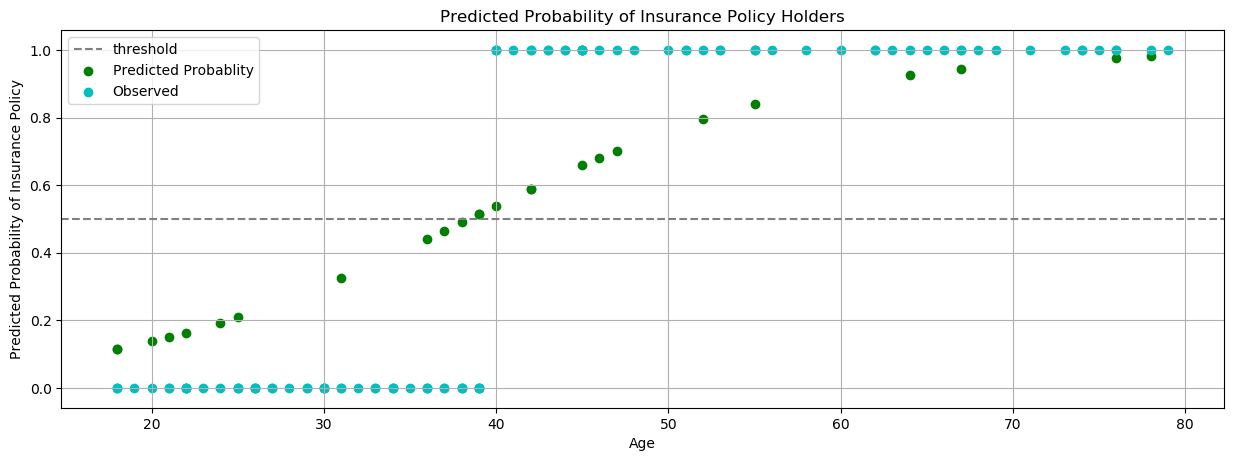

In [45]:
plt.figure(figsize=(15,5), dpi=100)
plt.scatter(X_test, lr.predict_proba(X_test)[:, 1], 
            label="Predicted Probablity",
            color="g")
plt.scatter(df.age, df.insurance, color="c", label="Observed")
plt.axhline(0.5, linestyle="--", color="gray", label="threshold")
plt.xlabel("Age")
plt.ylabel("Predicted Probability of Insurance Policy")
plt.title("Predicted Probability of Insurance Policy Holders")
plt.legend()
plt.grid()
plt.show()